__Алгоритм Кнута-Морриса-Пратта (КМП-алгоритм)__

Позволяет ускоренно находить какие либо наборы символов в тексте. O(n+m)

Смещаем то, что нужно найти не по 1 символу (как в обычном поиске), а сразу по префиксам

Этапы алгоритма КМП:

__Этап 1: формаирование массива pi(для сдвига по префиксам):__

смысл этого массива заключается в том, чтобы он указывал куда переместить указатель позиции при несоответствии символов

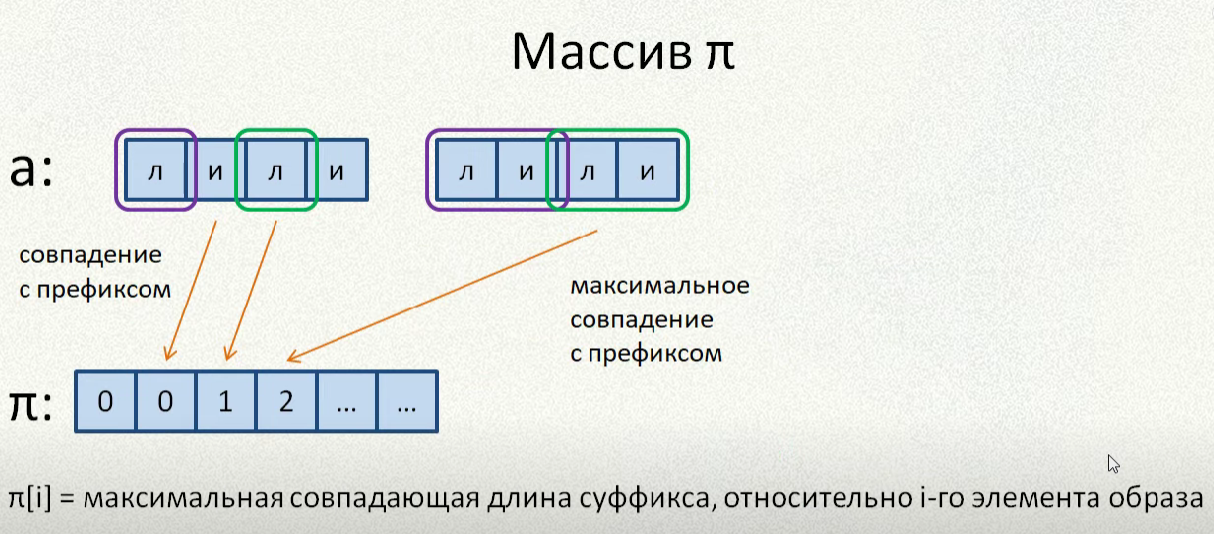

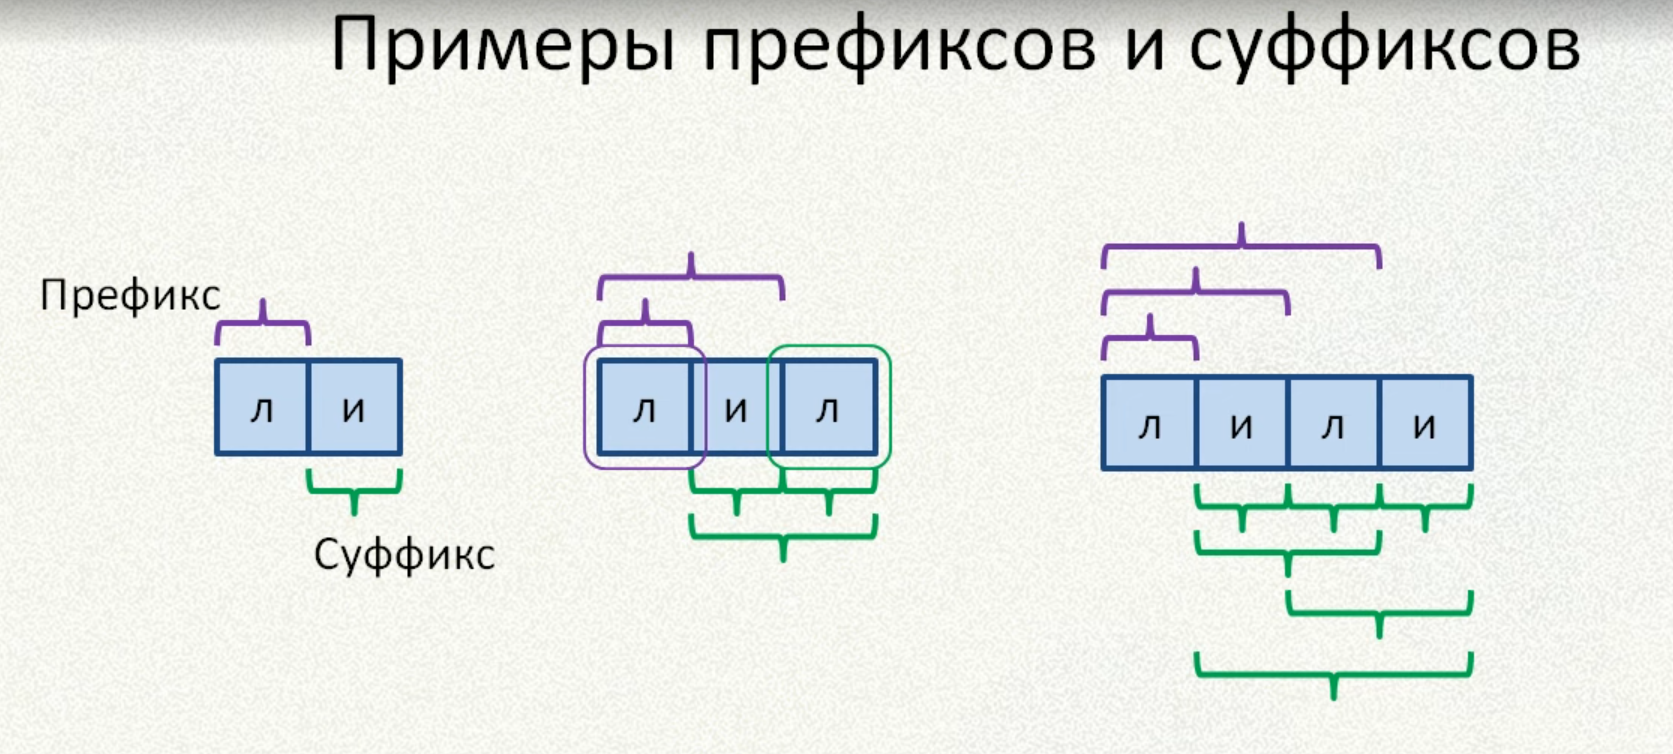

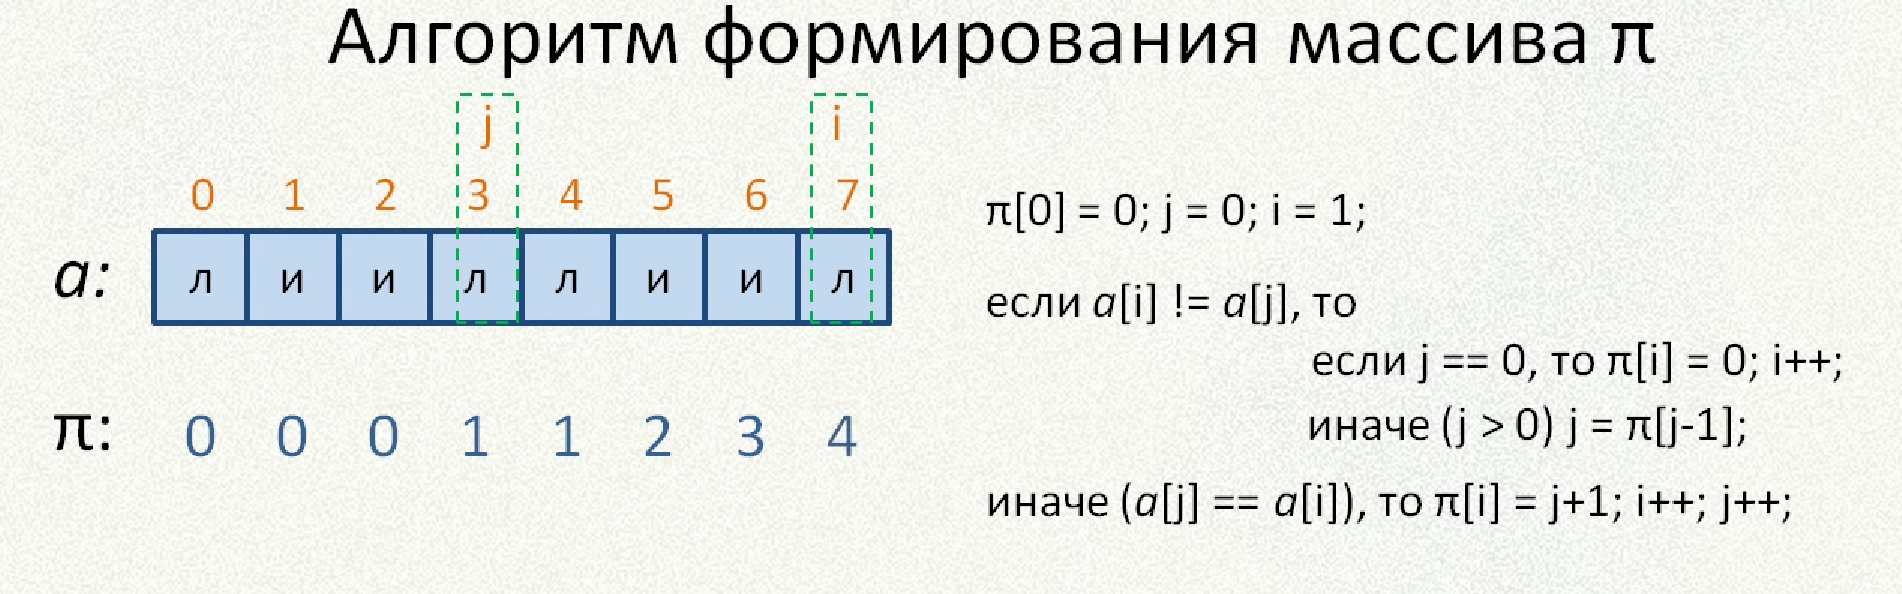

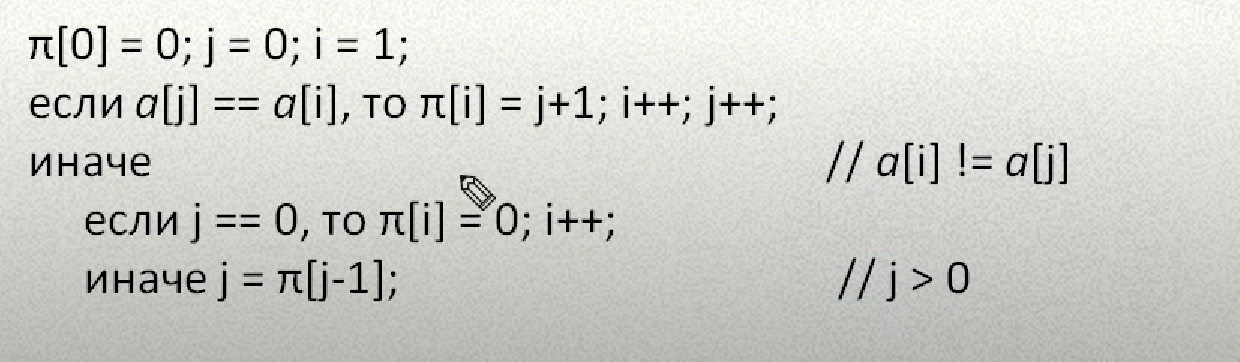

Сложность этого алгоритма: O(m)

__Этап 2: Поиск образа в строке:__

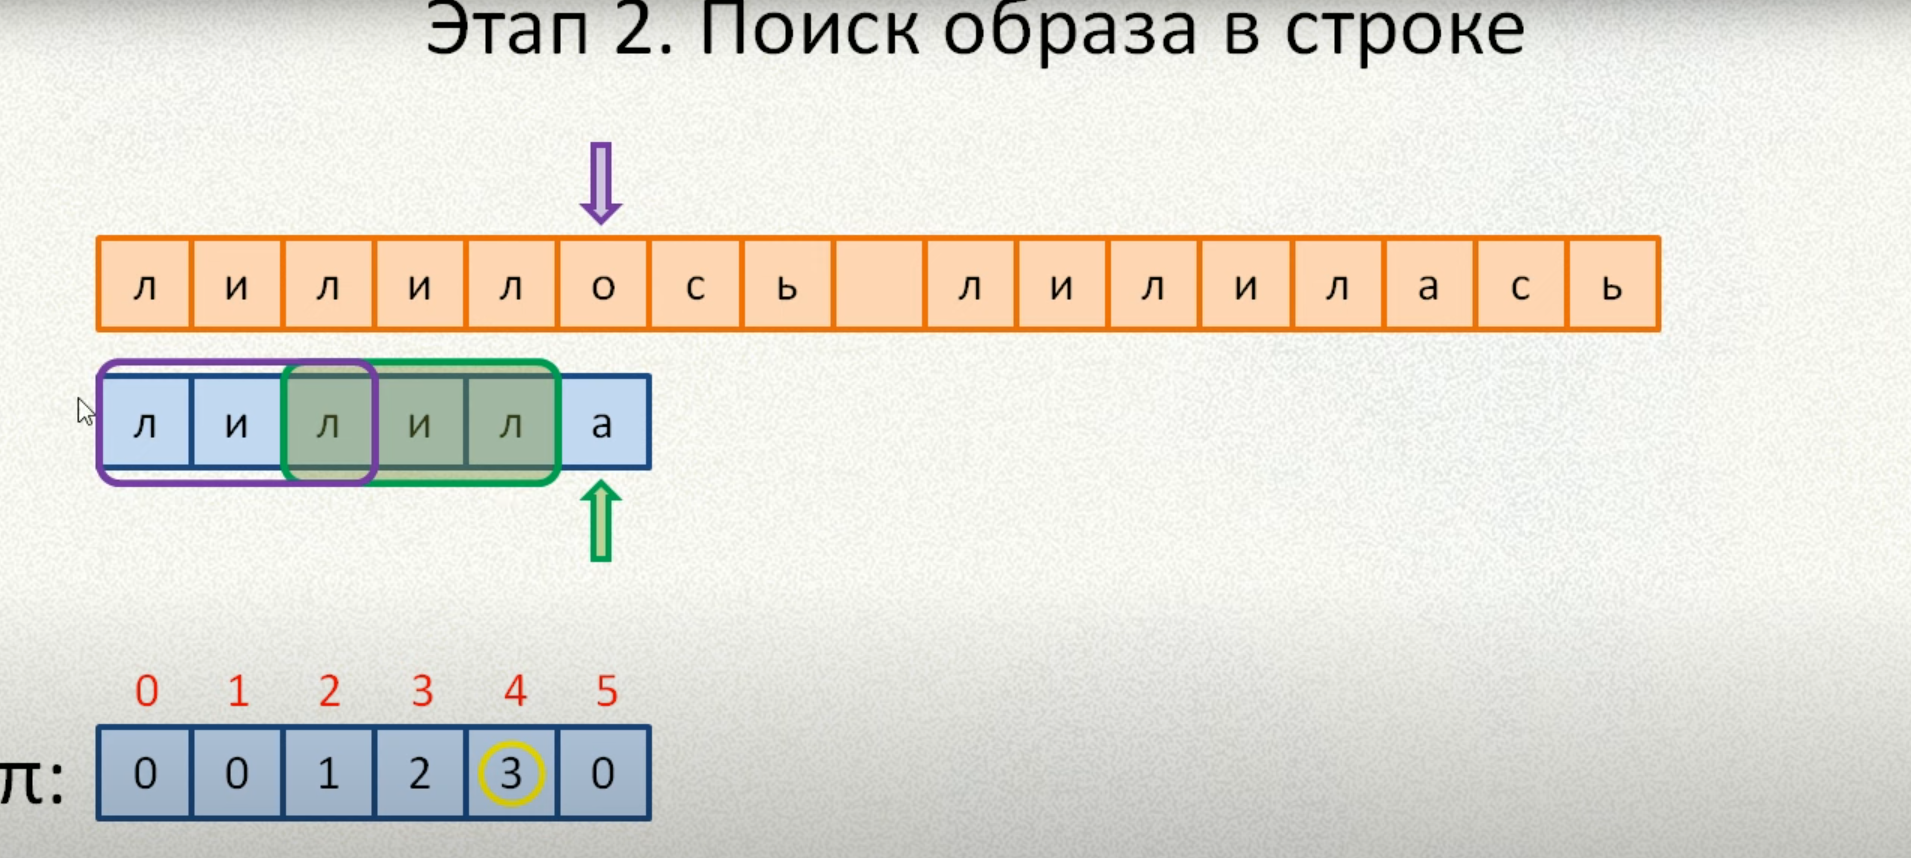

Цифра 3 в pi[4] означает, что 3 последних символа равны трем первым символам и эти все символы крч совпадают, поэтому нужно сдвинуть все символы так, чтобы совпадающие символы стояли друг напротив друга

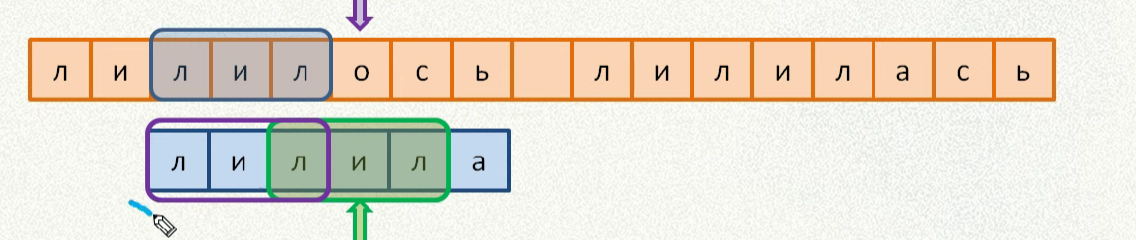

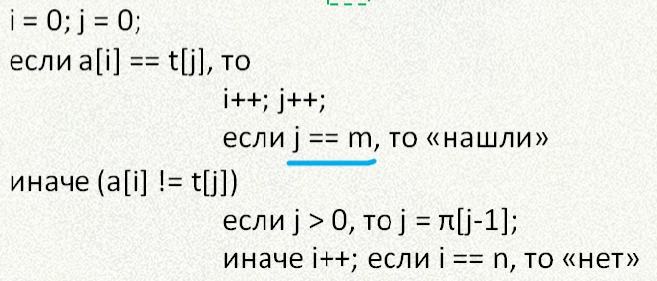

на скрине a массив с текстом, t массив с образцом (pi массив крч)

In [ ]:
def kmp_search(word, text):
    """
    Реализация алгоритма Кнута-Морриса-Пратта (KMP) для поиска подстроки в строке.

    Args:
        word: Строка, которую нужно найти (образец).
        text: Строка, в которой нужно искать.

    Returns:
        Индекс первого вхождения образца в текст, или -1, если образец не найден.
    """

    n = len(text)
    m = len(word)

    if m == 0:
        return 0  # Пустая строка всегда находится в начале

    if n == 0:
        return -1 # В пустой строке нечего искать

    # 1. Построение таблицы префиксов (pi)
    pi = [0] * m
    j = 0
    i = 1
    while i < m:
        if word[j] == word[i]:
            pi[i] = j + 1
            i += 1
            j += 1
        elif j == 0:
            pi[i] = 0
            i += 1
        else:
            j = pi[j - 1]

    # 2. Поиск образца в тексте
    i = 0  # Индекс по тексту
    j = 0  # Индекс по образцу
    while i < n:
        if text[i] == word[j]:  # Сравнение text[i] с word[j]
            i += 1
            j += 1

            if j == m:
                return i - m  # Образец найден! Возвращаем индекс начала вхождения
        else:
            if j > 0:
                j = pi[j - 1]
            else:
                i += 1

    return -1  # Образец не найден


# Пример использования
text = "абракадабралилаабра"
word = "лила"

index = kmp_search(word, text)

if index != -1:
    print(f"Образец '{word}' найден в тексте '{text}' по индексу: {index}")
else:
    print(f"Образец '{word}' не найден в тексте '{text}'")


text = "abcabcdababcdabcdabde"
word = "abcdabde"
index = kmp_search(word, text)

if index != -1:
    print(f"Образец '{word}' найден в тексте '{text}' по индексу: {index}")
else:
    print(f"Образец '{word}' не найден в тексте '{text}'")


Образец 'лила' найден в тексте 'абракадабралилаабра' по индексу: 11
Образец 'abcdabde' найден в тексте 'abcabcdababcdabcdabde' по индексу: 13
